
# **Evaluación Formativa: Preparación de Datos - DUOC FM**

## **¿Qué vas a lograr con este desafío?**
Vas a enfrentarte a un dataset real, sin procesar, y tu misión será transformarlo en un conjunto de datos limpio, coherente, enriquecido y listo para entrenar un modelo de Machine Learning.

**Este desafío no es solo técnico, sino reflexivo.**  
Debes cuestionar cada decisión, argumentar con fundamentos y aprovechar herramientas como ChatGPT *sin dejar que piense por ti*.

---

## **Indicaciones generales**
- **No se entregan soluciones ni funciones listas**, salvo el código de apertura del dataset.
- Cada sección contiene preguntas, pasos sugeridos y espacio para justificar.
- Puedes consultar fuentes externas, documentación y ChatGPT como apoyo, pero **tu razonamiento debe quedar registrado**.

---

## **Carga del dataset**

Usa el siguiente código para cargar el dataset base. Siéntete libre de cambiarlo por otra versión del mismo (año, fuente, formato) si quieres ampliar el desafío.

```python
import pandas as pd

url = "tripdata_2024.parquet"
df = pd.read_parquet(url)
df.head()
```



Has recibido un conjunto de datos reales con registros de viajes en taxi de la ciudad de Nueva York. Este dataset no está limpio ni documentado de forma completa. Además, algunos datos están mal tipificados y no todos los códigos están explicados dentro del archivo.

Tu tarea es actuar como analista de datos, reconstruyendo no solo el contenido y estructura del dataset, sino también su significado. Deberás entregar un diccionario de datos completo, preciso y justificado, como si fueras parte de un equipo técnico que necesita dejar este recurso listo para futuros análisis y modelamientos.







**Pregunta inicial:**  
> ¿Qué ves que te llame la atención? ¿Qué crees que no está bien desde ya?



## **1. Diagnóstico y análisis exploratorio**

Antes de transformar, primero observa.

### Actividad:
- Explora la estructura del DataFrame
- Identifica variables numéricas, categóricas y temporales
- Revisa si hay datos faltantes o inconsistencias

### Preguntas para ti:
- ¿Qué columnas parecen más útiles? ¿Cuáles menos?
- ¿Dónde ves valores sospechosos?
- ¿Qué tipo de errores pueden afectar el análisis?
- ¿Cómo podrías detectar outliers sin saber sus rangos válidos?

*(Puedes usar métodos como `.info()`, `.describe()`, `.value_counts()`, `.isnull().sum()` y visualizaciones simples.)*

## Propuesta opcional:
*Usa histplot, boxplot, countplot o pairplot para observar la forma, dispersión y rarezas.*

## Razón pedagógica:
*A veces los outliers, valores nulos o codificaciones erradas son más visibles en una gráfica que en un .describe().*


In [3]:
### Comencemos :)

import pandas as pd

url = "/content/tripdata_2024.parquet"
df = pd.read_parquet(url)
df.head()


,Vendor,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,Ratecode,Store_forward_flag,Payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,"Creative Mobile Technologies, LLC",2024-01-01 00:18:38,2024-01-01 00:26:59,1.0,1.60,Standard rate,Not a store and forward trip,Credit card,10.0,3.5,...,18.00,2.5,0.0,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
1,"Creative Mobile Technologies, LLC",2024-01-01 00:32:40,2024-01-01 00:35:13,1.0,0.50,Standard rate,Not a store and forward trip,Credit card,5.1,3.5,...,12.12,2.5,0.0,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
2,"Creative Mobile Technologies, LLC",2024-01-01 00:44:04,2024-01-01 00:46:01,1.0,0.60,Standard rate,Not a store and forward trip,Credit card,5.1,3.5,...,12.10,2.5,0.0,0.0,Manhattan,Lenox Hill West,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
3,"Curb Mobility, LLC",2024-01-01 00:14:27,2024-01-01 00:20:01,3.0,0.52,Standard rate,Not a store and forward trip,Cash,7.2,1.0,...,9.70,0.0,0.0,0.0,Manhattan,Washington Heights South,Boro Zone,Manhattan,Washington Heights South,Boro Zone
4,"Curb Mobility, LLC",2024-01-01 00:21:34,2024-01-01 00:25:06,3.0,0.66,Standard rate,Not a store and forward trip,Cash,5.8,1.0,...,8.30,0.0,0.0,0.0,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone


In [4]:
# Información básica del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print("\n=== INFORMACIÓN DE COLUMNAS ===")
print(df.info())
print("\n=== TIPOS DE DATOS ===")
print(df.dtypes.value_counts())

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones del dataset: (3475226, 24)
Número de filas: 3,475,226
Número de columnas: 24

=== INFORMACIÓN DE COLUMNAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Vendor                 object        
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   Ratecode               object        
 6   Store_forward_flag     object        
 7   Payment_type           object        
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64  

=== ANÁLISIS DE VALORES NULOS ===
                  Columna  Valores_Nulos  Porcentaje_Nulos
3         passenger_count         540149         15.542845
5                Ratecode         540149         15.542845
6      Store_forward_flag         540149         15.542845
15   congestion_surcharge         540149         15.542845
16            Airport_fee         540149         15.542845
23        DO_service_zone          24062          0.692387
21             DO_Borough          12086          0.347776
22                DO_Zone          11976          0.344611
20        PU_service_zone           9521          0.273968
19                PU_Zone           8141          0.234258
18             PU_Borough           1380          0.039710
7            Payment_type              0          0.000000
0                  Vendor              0          0.000000
4           trip_distance              0          0.000000
1    tpep_pickup_datetime              0          0.000000
2   tpep_dropoff_datet

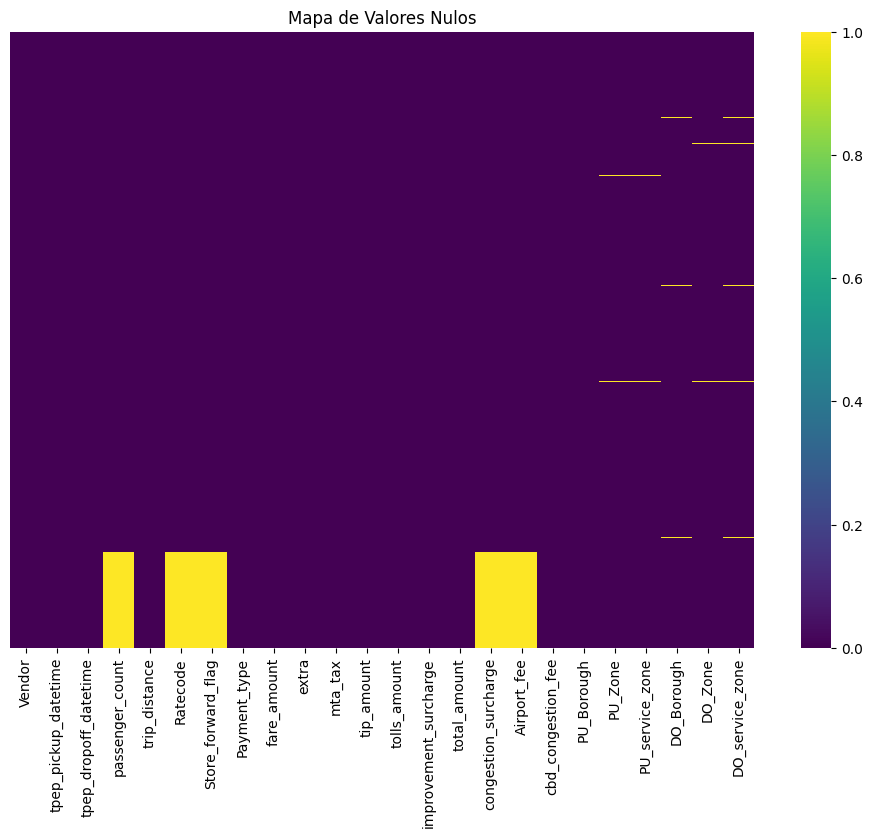

In [5]:
# Análisis detallado de valores nulos
print("=== ANÁLISIS DE VALORES NULOS ===")
valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

analisis_nulos = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores_Nulos': valores_nulos.values,
    'Porcentaje_Nulos': porcentaje_nulos.values
}).sort_values('Porcentaje_Nulos', ascending=False)

print(analisis_nulos)

# Visualización de valores nulos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

In [6]:
# Separación automática de variables por tipo
print("=== IDENTIFICACIÓN DE TIPOS DE VARIABLES ===")

# Variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Variables Numéricas ({len(variables_numericas)}): {variables_numericas}")

# Variables categóricas
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Variables Categóricas ({len(variables_categoricas)}): {variables_categoricas}")

# Variables datetime (si las hay)
variables_datetime = df.select_dtypes(include=['datetime64']).columns.tolist()
if variables_datetime:
    print(f"Variables DateTime ({len(variables_datetime)}): {variables_datetime}")

=== IDENTIFICACIÓN DE TIPOS DE VARIABLES ===
Variables Numéricas (12): ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee']
Variables Categóricas (10): ['Vendor', 'Ratecode', 'Store_forward_flag', 'Payment_type', 'PU_Borough', 'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone', 'DO_service_zone']
Variables DateTime (2): ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===\n")

# Estadísticas generales
estadisticas_numericas = df[variables_numericas].describe()
print(estadisticas_numericas)

print("\n=== ANÁLISIS DE DISTRIBUCIÓN Y OUTLIERS ===")
for var in variables_numericas:
    print(f"\n--- {var} ---")
    print(f"Valores únicos: {df[var].nunique()}")
    print(f"Min: {df[var].min()}  |  Max: {df[var].max()}")
    print(f"Media: {df[var].mean():.2f}  |  Mediana: {df[var].median():.2f}  |  Desv. estándar: {df[var].std():.2f}")

    # Cálculo del rango intercuartílico (IQR)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Comentario explicativo (solo una vez)
    if var == variables_numericas[0]:
        print("\nNota: El IQR (Interquartile Range) mide la dispersión del 50% central de los datos.")
        print("Se consideran *outliers* los valores fuera del rango: [Q1 - 1.5*IQR, Q3 + 1.5*IQR]")

    # Conteo de outliers
    outliers_bajos = (df[var] < Q1 - 1.5 * IQR).sum()
    outliers_altos = (df[var] > Q3 + 1.5 * IQR).sum()
    total_outliers = outliers_bajos + outliers_altos
    print(f"Outliers detectados: {total_outliers}  ({outliers_bajos} bajos, {outliers_altos} altos)")

    # Gráfico boxplot
    plt.figure(figsize=(6, 1.2))
    sns.boxplot(x=df[var], color="skyblue", fliersize=4)
    plt.title(f"Boxplot de {var}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()


=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===



NameError: name 'df' is not defined

In [8]:
print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")

for variable in variables_categoricas:
    print(f"\n--- {variable} ---")
    print(f"Valores únicos: {df[variable].nunique()}")
    print(f"Valores nulos: {df[variable].isnull().sum()}")

    # Frecuencias
    frecuencias = df[variable].value_counts()
    print("Top 10 valores más frecuentes:")
    print(frecuencias.head(10))

    # Porcentajes
    porcentajes = df[variable].value_counts(normalize=True) * 100
    print("\nPorcentajes (Top 5):")
    print(porcentajes.head(5).round(2))

=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

--- Vendor ---
Valores únicos: 4
Valores nulos: 0
Top 10 valores más frecuentes:
Vendor
Curb Mobility, LLC                   2719860
Creative Mobile Technologies, LLC     753671
Helix                                   1206
Myle Technologies Inc                    489
Name: count, dtype: int64

Porcentajes (Top 5):
Vendor
Curb Mobility, LLC                   78.26
Creative Mobile Technologies, LLC    21.69
Helix                                 0.03
Myle Technologies Inc                 0.01
Name: proportion, dtype: float64

--- Ratecode ---
Valores únicos: 7
Valores nulos: 540149
Top 10 valores más frecuentes:
Ratecode
Standard rate            2756472
JFK                        94420
Null/unknown               41963
Negotiated fare            26501
Newark                      8622
Nassau or Westchester       7092
Group ride                     7
Name: count, dtype: int64

Porcentajes (Top 5):
Ratecode
Standard rate      93.91
JFK               

In [9]:
print("=== ANÁLISIS DE DUPLICADOS ===")
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

if duplicados > 0:
    print(f"Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")
    print("\nPrimeras 5 filas duplicadas:")
    print(df[df.duplicated()].head())

=== ANÁLISIS DE DUPLICADOS ===
Filas duplicadas encontradas: 0


=== ANÁLISIS DE CORRELACIÓN ===


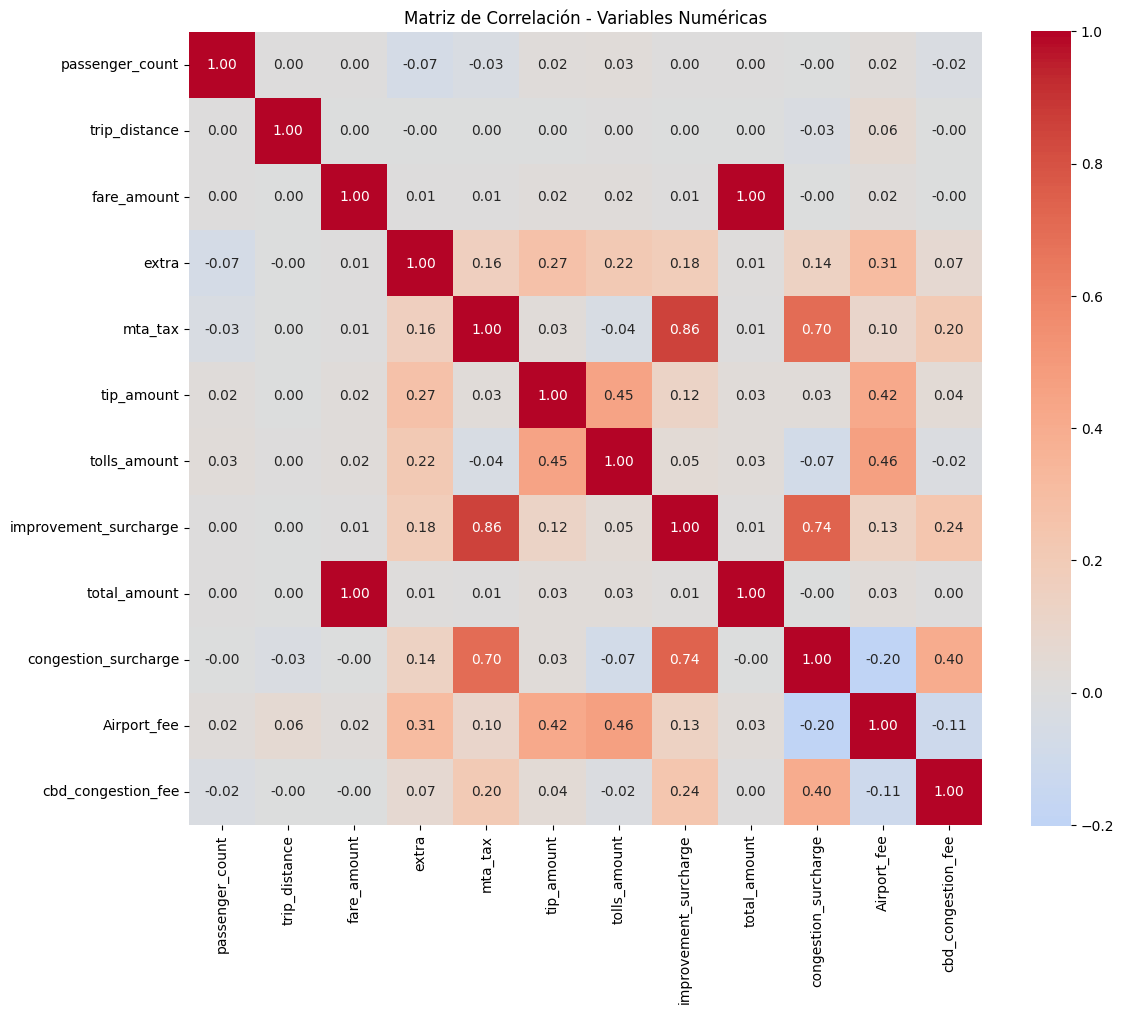


Correlaciones fuertes detectadas:
fare_amount - total_amount: 1.000
mta_tax - improvement_surcharge: 0.857
improvement_surcharge - congestion_surcharge: 0.736


In [10]:
print("=== ANÁLISIS DE CORRELACIÓN ===")

if len(variables_numericas) > 1:
    # Matriz de correlación
    correlacion = df[variables_numericas].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.tight_layout()
    plt.show()

    # Correlaciones altas (>0.7 o <-0.7)
    print("\nCorrelaciones fuertes detectadas:")
    correlaciones_altas = []
    for i in range(len(correlacion.columns)):
        for j in range(i+1, len(correlacion.columns)):
            if abs(correlacion.iloc[i, j]) > 0.7:
                correlaciones_altas.append((
                    correlacion.columns[i],
                    correlacion.columns[j],
                    correlacion.iloc[i, j]
                ))

    for var1, var2, corr in correlaciones_altas:
        print(f"{var1} - {var2}: {corr:.3f}")

In [11]:
print("=== RESUMEN EJECUTIVO DEL DATASET ===")
print(f"Dataset con {df.shape[0]:,} filas y {df.shape[1]} columnas")
print(f"Variables numéricas: {len(variables_numericas)}")
print(f"Variables categóricas: {len(variables_categoricas)}")
print(f"Total de valores nulos: {df.isnull().sum().sum():,}")
print(f"Porcentaje de completitud: {((df.size - df.isnull().sum().sum()) / df.size * 100):.1f}%")
print(f"Filas duplicadas: {df.duplicated().sum()}")

# Memoria utilizada
memoria_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memoria utilizada: {memoria_mb:.1f} MB")

=== RESUMEN EJECUTIVO DEL DATASET ===
Dataset con 3,475,226 filas y 24 columnas
Variables numéricas: 12
Variables categóricas: 10
Total de valores nulos: 2,767,911
Porcentaje de completitud: 96.7%
Filas duplicadas: 0
Memoria utilizada: 2681.0 MB


In [12]:
print("=== INVESTIGACIÓN DE PROBLEMAS DE CALIDAD ===")

# 1. Análisis de valores extremos en trip_distance
print("1. ANÁLISIS DE DISTANCIAS EXTREMAS")
print(f"Distancias > 100 km: {(df['trip_distance'] > 100).sum():,}")
print(f"Distancias > 1000 km: {(df['trip_distance'] > 1000).sum():,}")
print("Top 10 distancias más largas:")
print(df.nlargest(10, 'trip_distance')[['trip_distance', 'fare_amount', 'total_amount', 'PU_Zone', 'DO_Zone']])

# 2. Análisis de montos negativos
print("\n2. ANÁLISIS DE MONTOS NEGATIVOS")
for columna in ['fare_amount', 'tip_amount', 'total_amount']:
    negativos = (df[columna] < 0).sum()
    print(f"{columna} negativos: {negativos:,} ({negativos/len(df)*100:.2f}%)")

# 3. Relación entre valores nulos y tipo de pago
print("\n3. ANÁLISIS DE PATRÓN DE NULOS")
print("Distribución de Payment_type en registros con nulos:")
nulos_passenger = df['passenger_count'].isnull()
print(df[nulos_passenger]['Payment_type'].value_counts())

print("\nDistribución de Payment_type en registros completos:")
completos_passenger = df['passenger_count'].notnull()
print(df[completos_passenger]['Payment_type'].value_counts())

# 4. Análisis de coherencia fare_amount vs total_amount
print("\n4. ANÁLISIS DE COHERENCIA MONTOS")
df['diferencia_total_fare'] = df['total_amount'] - df['fare_amount']
print("Estadísticas de diferencia (total - fare):")
print(df['diferencia_total_fare'].describe())

# 5. Análisis temporal
print("\n5. ANÁLISIS TEMPORAL")
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
print("Distribución por hora del día:")
print(df['pickup_hour'].value_counts().sort_index())

=== INVESTIGACIÓN DE PROBLEMAS DE CALIDAD ===
1. ANÁLISIS DE DISTANCIAS EXTREMAS
Distancias > 100 km: 162
Distancias > 1000 km: 116
Top 10 distancias más largas:
         trip_distance  fare_amount  total_amount  \
3275762      276423.57        -4.75          5.00   
3188501      276099.95         9.13         13.88   
3240337      222167.49        31.19         35.94   
3112173      206137.99        24.89         29.64   
3374854      202771.63        10.10         14.85   
3081597      189687.43        12.70         17.45   
3069039      181139.99         6.33         11.08   
3312563      168079.57        -4.00          4.49   
3195037      167452.94        -4.00          5.45   
3138510      164959.95        14.05         18.05   

                                PU_Zone                       DO_Zone  
3275762                  Midtown Center                   Murray Hill  
3188501  Stuy Town/Peter Cooper Village           UN/Turtle Bay South  
3240337                     Cobble Hil

=== VISUALIZACIONES DE DIAGNÓSTICO ===


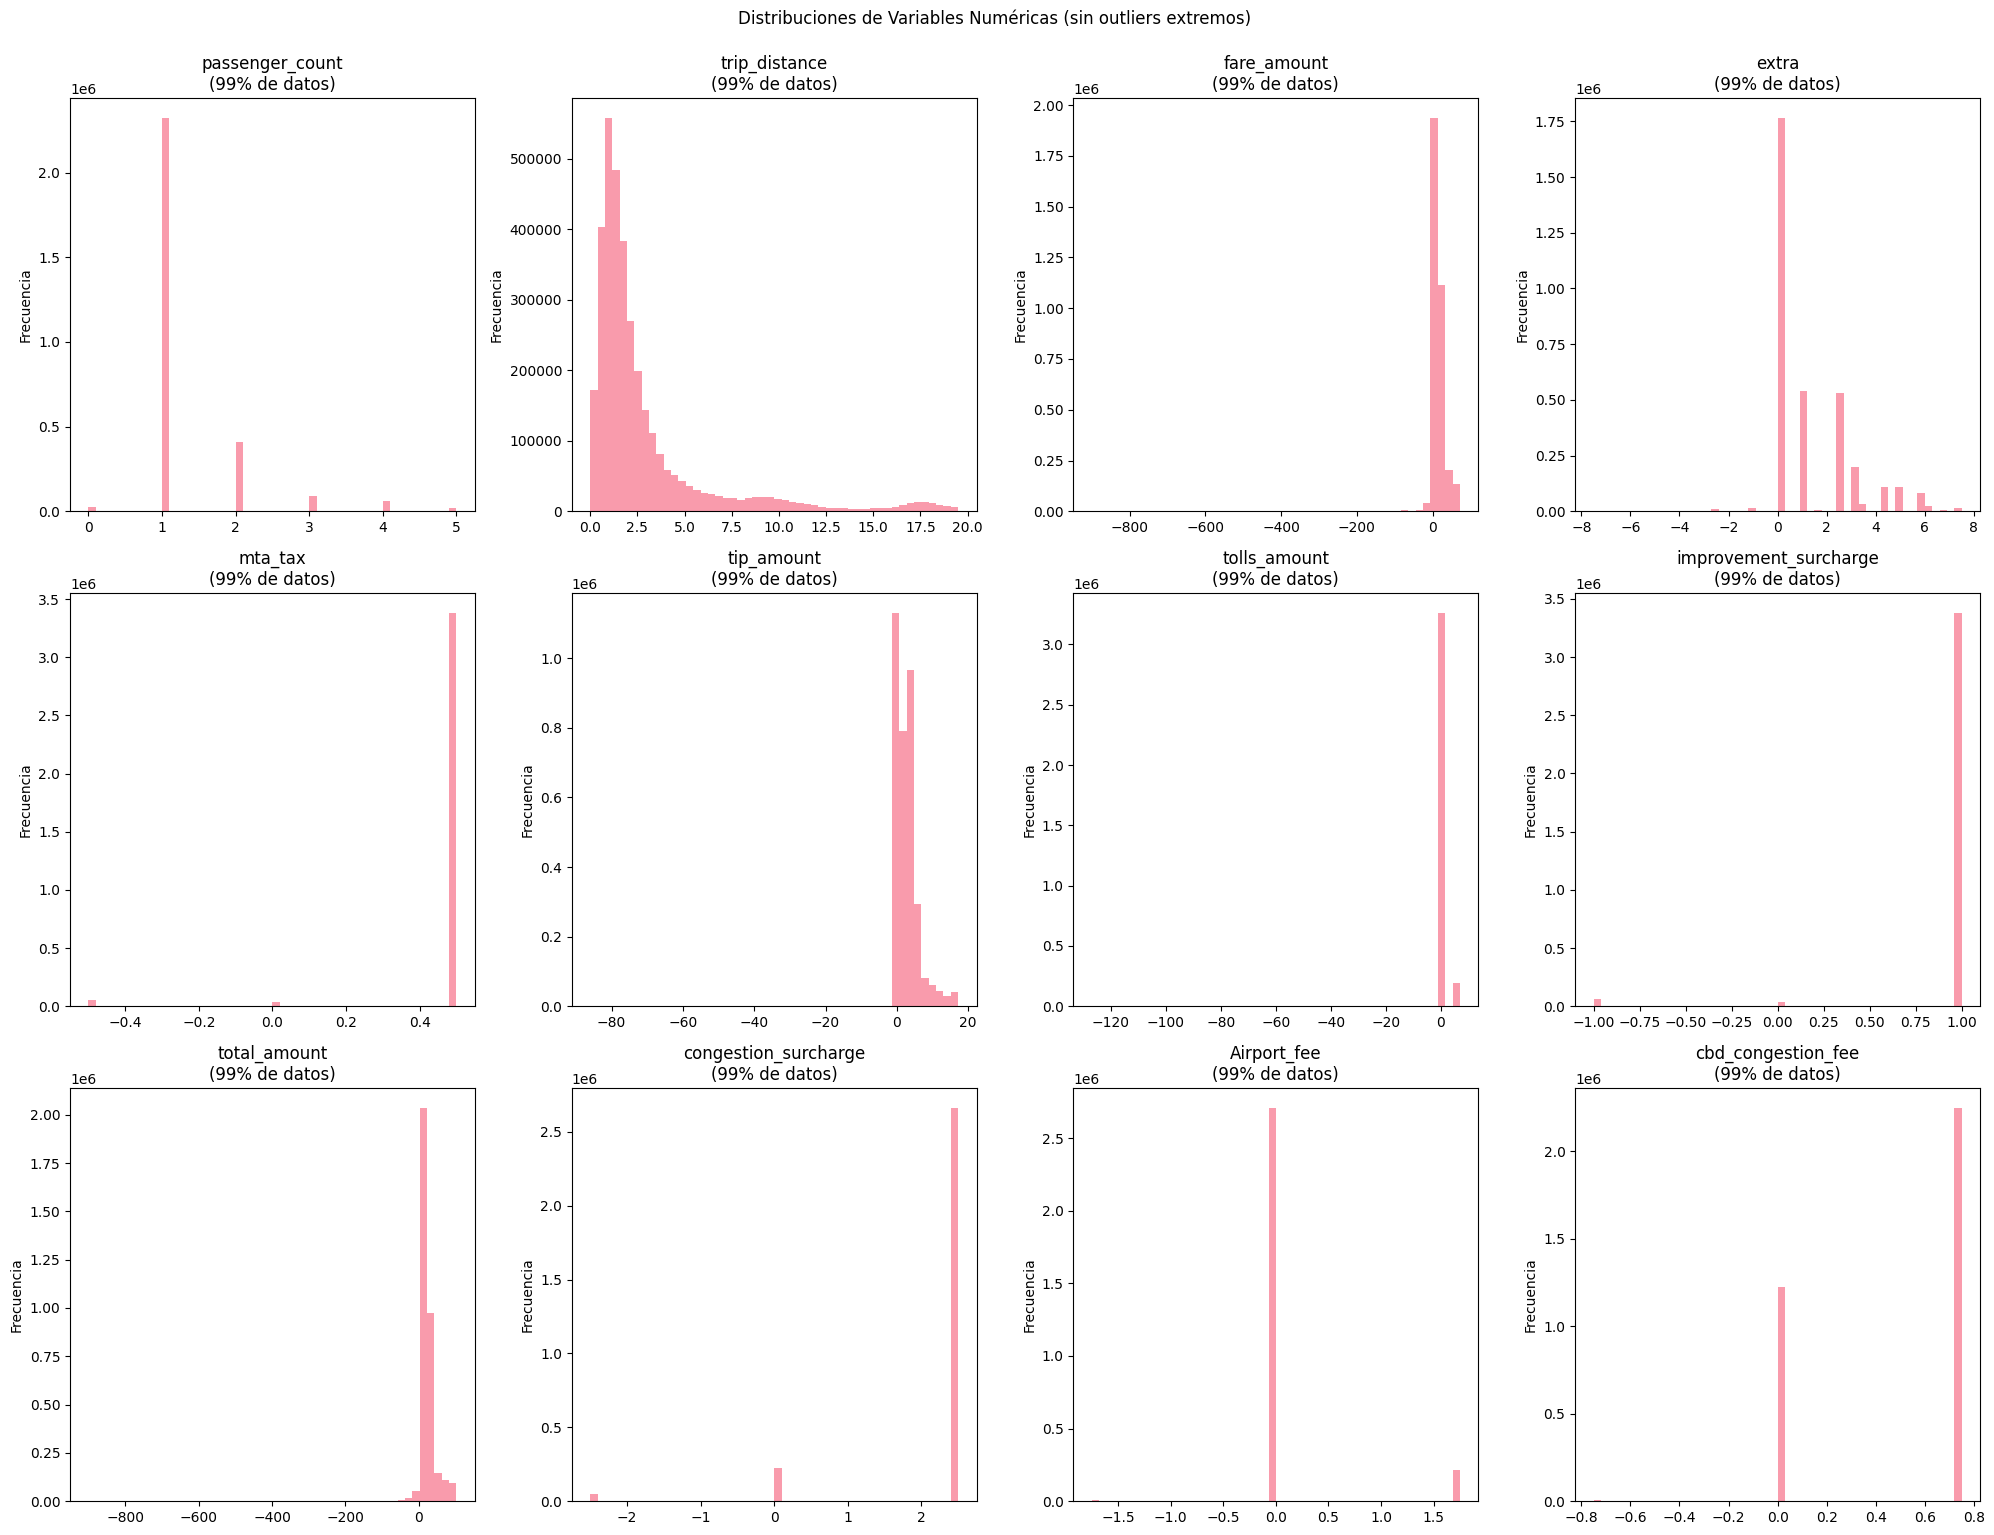

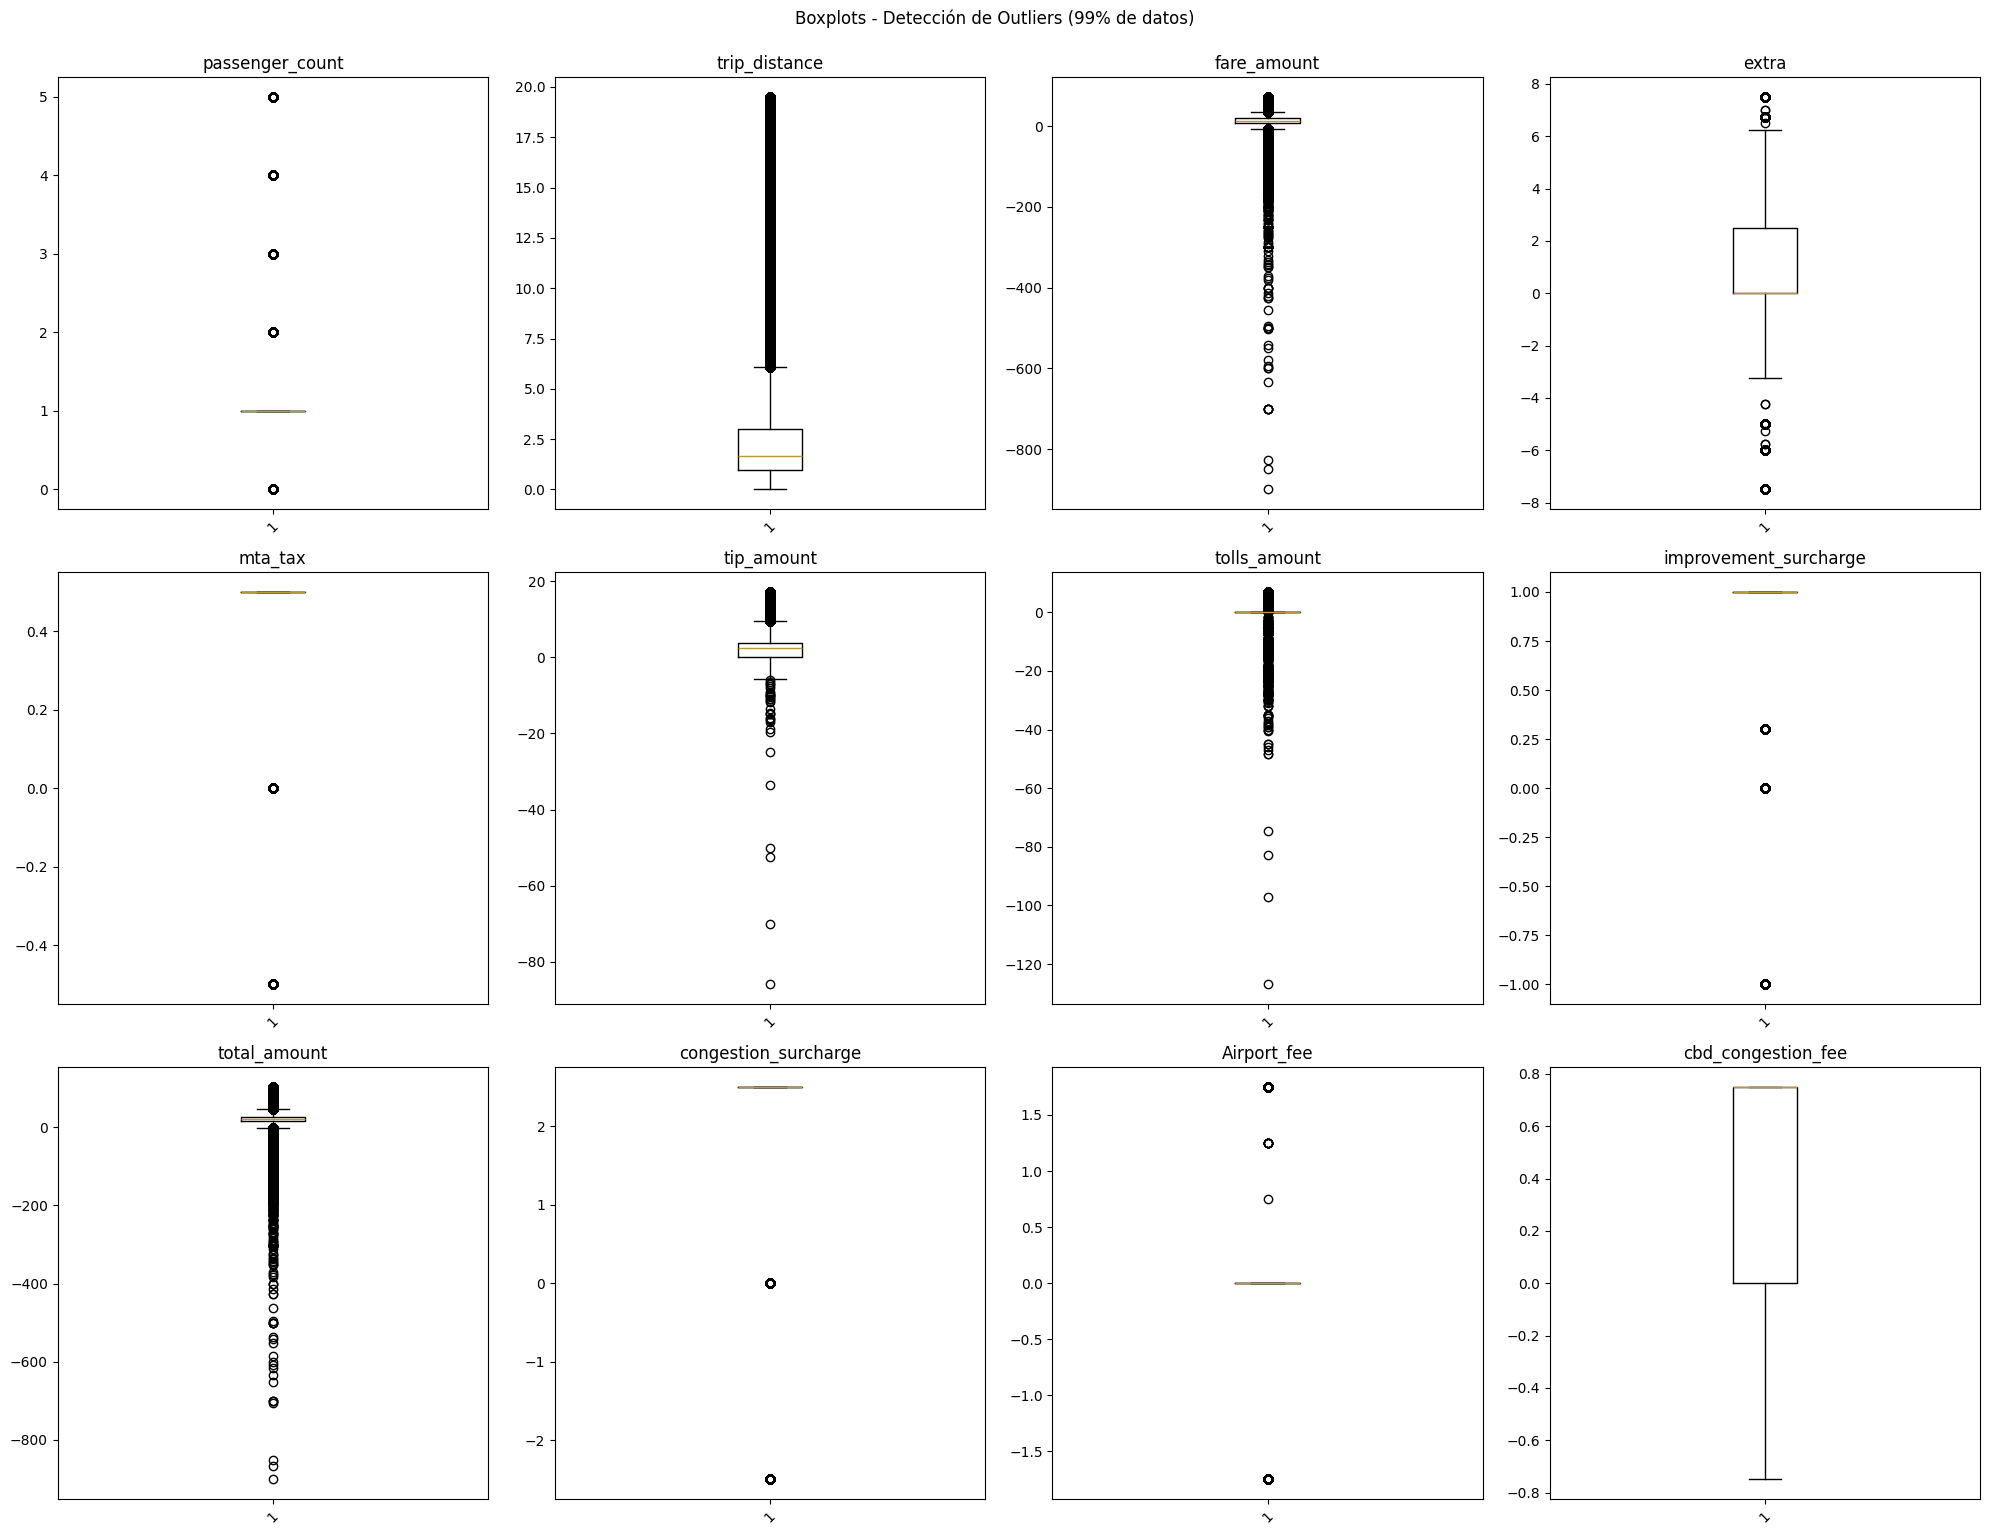

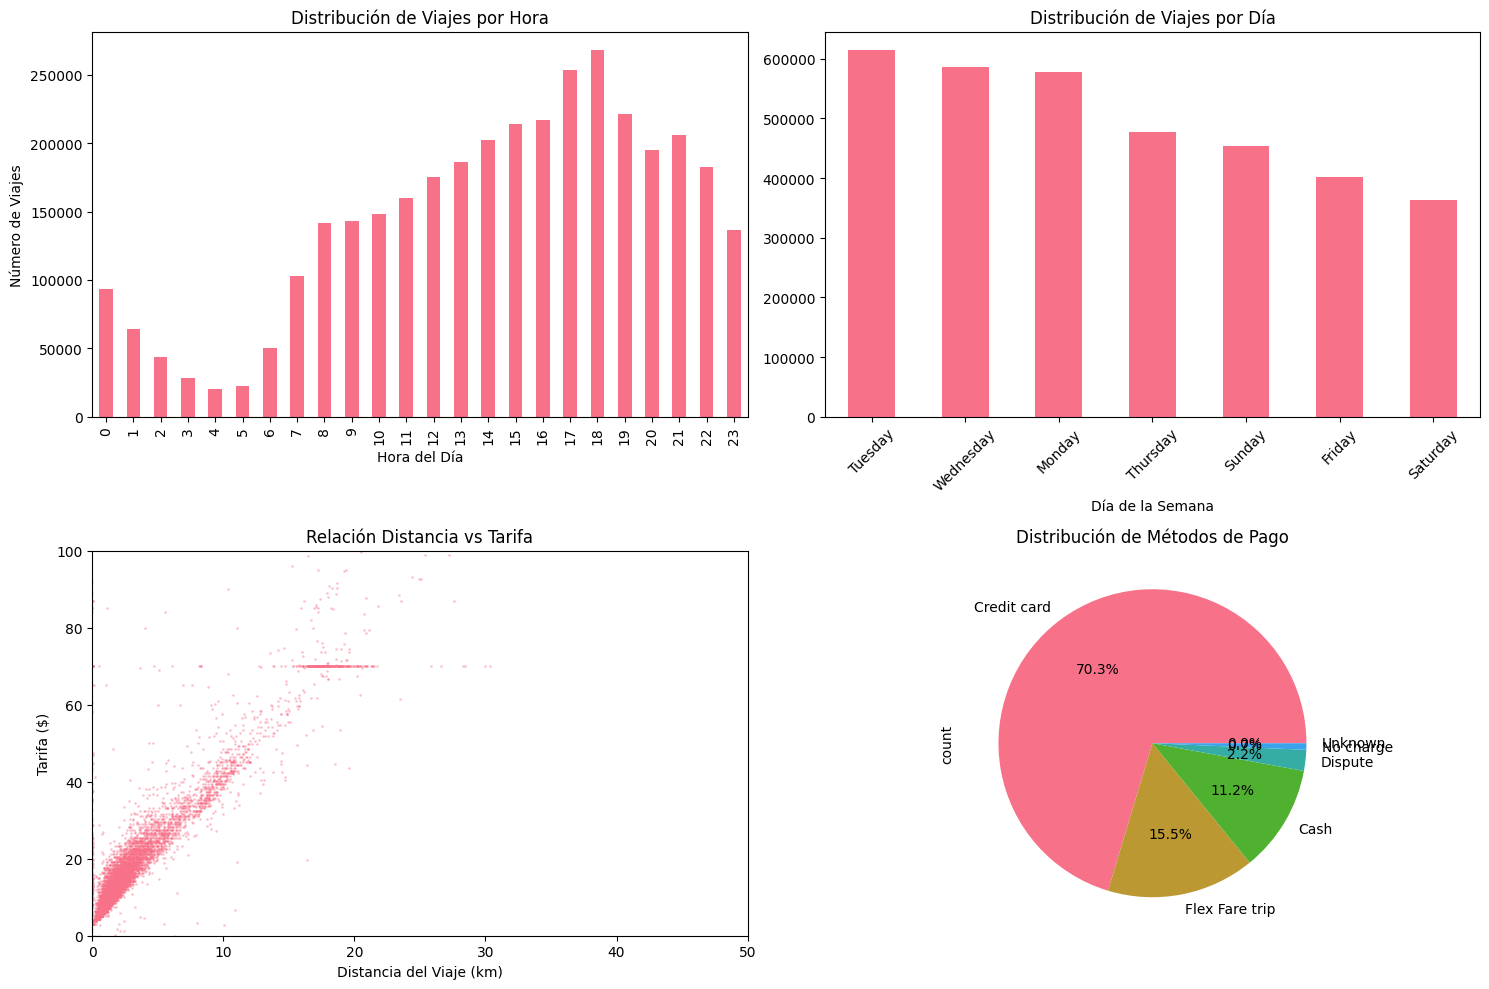

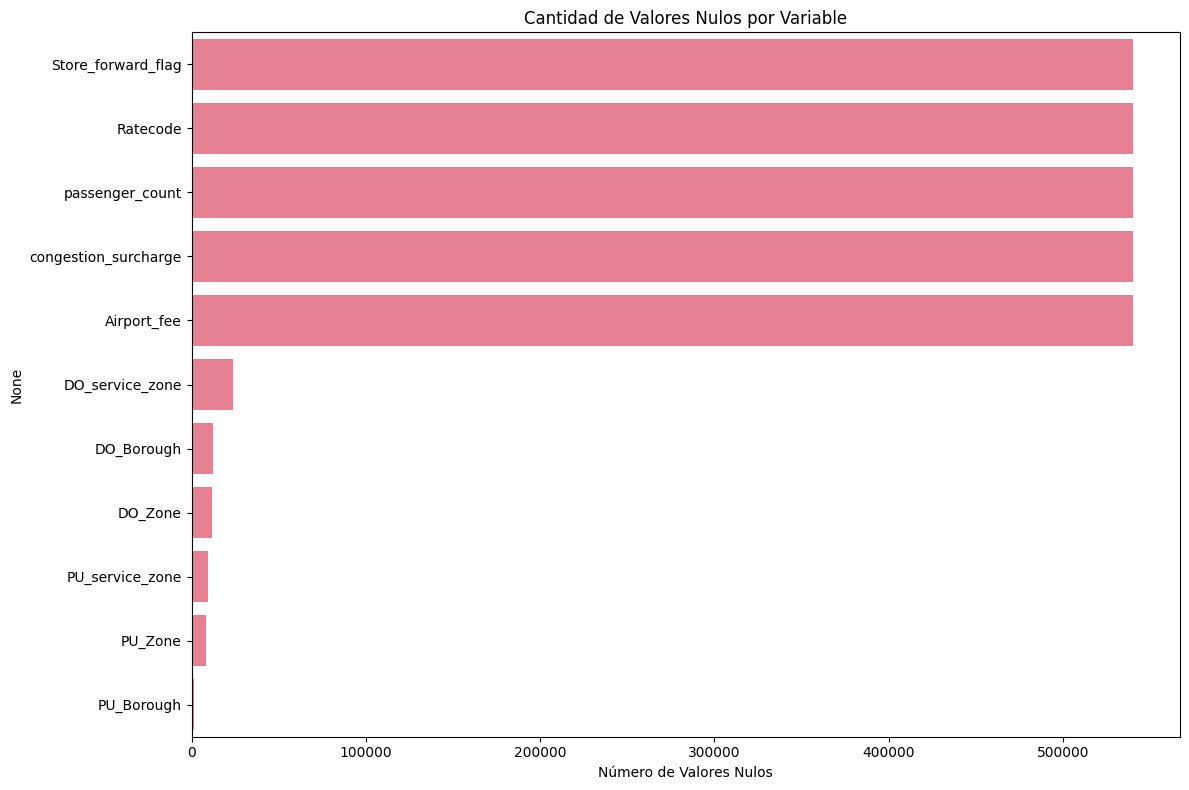

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🎨 Estilo visual suave y limpio
sns.set(style="whitegrid")
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.titlesize"] = 12

print("=== VISUALIZACIONES DE DIAGNÓSTICO ===\n")

# Lista de variables numéricas del dataset
variables_numericas = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee'
]

# -------------------------------------------------------------------
# 1. Distribuciones sin valores extremos (para ver la forma real)
# -------------------------------------------------------------------
print("→ Mostrando histogramas de variables numéricas (quitando el 1% más alto para enfocar)...")

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
for i, var in enumerate(variables_numericas):
    row, col = divmod(i, 4)
    data = df[var].dropna()
    lim_sup = data.quantile(0.99)
    data_filtrada = data[data <= lim_sup]

    axes[row, col].hist(data_filtrada, bins=40, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'{var} (hasta p99)')
    axes[row, col].set_ylabel('Frecuencia')

plt.suptitle('Distribuciones (eliminando outliers extremos)', y=1.03, fontsize=14)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 2. Boxplots para detectar outliers de forma visual
# -------------------------------------------------------------------
print("→ Mostrando boxplots para detectar valores atípicos...")

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
for i, var in enumerate(variables_numericas):
    row, col = divmod(i, 4)
    data = df[var].dropna()
    lim_sup = data.quantile(0.99)

    sns.boxplot(x=data[data <= lim_sup], ax=axes[row, col], color='lightcoral', fliersize=2)
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_xlabel("")

plt.suptitle('Boxplots (hasta percentil 99)', y=1.03, fontsize=14)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3. Exploración de patrones temporales y relaciones clave
# -------------------------------------------------------------------
print("→ Explorando patrones temporales y relaciones entre variables...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# a. Viajes por hora
df['pickup_hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Viajes por Hora')
axes[0, 0].set_xlabel('Hora del Día')
axes[0, 0].set_ylabel('Cantidad')

# b. Viajes por día
df['pickup_day'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Viajes por Día de la Semana')
axes[0, 1].tick_params(axis='x', rotation=45)

# c. Relación distancia vs tarifa (con muestra)
muestra = df.sample(10000, random_state=1)
axes[1, 0].scatter(muestra['trip_distance'], muestra['fare_amount'], alpha=0.3, s=2)
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 100)
axes[1, 0].set_title('Distancia vs Tarifa')
axes[1, 0].set_xlabel('Distancia del Viaje (km)')
axes[1, 0].set_ylabel('Tarifa ($)')

# d. Métodos de pago
df['Payment_type'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Métodos de Pago')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 4. Valores nulos por variable
# -------------------------------------------------------------------
print("→ Revisando columnas con valores nulos...")

nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

if not nulos.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=nulos.values, y=nulos.index, color='salmon')
    plt.title('Valores Nulos por Variable')
    plt.xlabel('Cantidad de Nulos')
    plt.show()
else:
    print("No se encontraron valores nulos en el dataset.")


In [14]:
import pandas as pd
import numpy as np

print("=== CREACIÓN DE VARIABLES DERIVADAS ===\n")

# --------------------------------------------------
# 1. 🕒 Variables Temporales
# Extraemos hora, día de la semana, mes y número del día (lunes = 0)
# --------------------------------------------------
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday  # Lunes = 0

# --------------------------------------------------
# 2. ⏱️ Duración del Viaje en Minutos
# Se calcula como diferencia entre hora de llegada y salida
# --------------------------------------------------
df['trip_duration_minutes'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
)

# --------------------------------------------------
# 3. 🌅 Categorización del Momento del Día
# Dividimos el día en: Madrugada, Mañana, Tarde, Noche
# --------------------------------------------------
def categorizar_hora(h):
    if 6 <= h < 12:
        return 'Mañana'
    elif 12 <= h < 18:
        return 'Tarde'
    elif 18 <= h < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['periodo_dia'] = df['pickup_hour'].apply(categorizar_hora)

# --------------------------------------------------
# 4. 📏 Categorización de la Distancia del Viaje
# Segmentamos en rangos manejables para análisis
# --------------------------------------------------
def categorizar_distancia(d):
    if pd.isna(d):
        return 'Desconocida'
    elif d <= 2:
        return 'Corta (≤2km)'
    elif d <= 5:
        return 'Media (2-5km)'
    elif d <= 10:
        return 'Larga (5-10km)'
    else:
        return 'Muy Larga (>10km)'

df['categoria_distancia'] = df['trip_distance'].apply(categorizar_distancia)

# --------------------------------------------------
# 5. 💸 Categorización del Monto de la Tarifa
# Clasificamos en niveles económicos para interpretación más fácil
# --------------------------------------------------
def categorizar_tarifa(t):
    if pd.isna(t):
        return 'Desconocida'
    elif t <= 10:
        return 'Económica (≤$10)'
    elif t <= 20:
        return 'Media ($10-20)'
    elif t <= 50:
        return 'Alta ($20-50)'
    else:
        return 'Premium (>$50)'

df['categoria_tarifa'] = df['fare_amount'].apply(categorizar_tarifa)

# --------------------------------------------------
# 6. 🚕 Velocidad Promedio del Viaje (km/h)
# Usamos la distancia y duración para estimarla
# --------------------------------------------------
df['velocidad_promedio'] = np.where(
    df['trip_duration_minutes'] > 0,
    (df['trip_distance'] / df['trip_duration_minutes']) * 60,
    np.nan
)

# --------------------------------------------------
# 7. 💰 Porcentaje de Propina
# Cuánto representa la propina sobre la tarifa base
# --------------------------------------------------
df['tip_percentage'] = np.where(
    df['fare_amount'] > 0,
    (df['tip_amount'] / df['fare_amount']) * 100,
    0
)

# --------------------------------------------------
# 8. ⚠️ Bandera de Viaje Problemático
# Detectamos viajes con datos anómalos o sospechosos
# --------------------------------------------------
df['viaje_problematico'] = (
    (df['trip_distance'] > 100) |  # distancia extrema
    (df['fare_amount'] < 0) |
    (df['total_amount'] < 0) |
    (df['trip_duration_minutes'] < 0) |
    (df['velocidad_promedio'] > 100)  # más de 100 km/h promedio
)

# --------------------------------------------------
# 📋 Resumen Final
# --------------------------------------------------
nuevas_vars = [
    'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday',
    'trip_duration_minutes', 'periodo_dia', 'categoria_distancia',
    'categoria_tarifa', 'velocidad_promedio', 'tip_percentage',
    'viaje_problematico'
]

print("Variables nuevas creadas:")
for v in nuevas_vars:
    print(f"✔️ {v}")

print(f"\n🚨 Viajes problemáticos detectados: {df['viaje_problematico'].sum():,}")
print(f"📉 Porcentaje de viajes problemáticos: {df['viaje_problematico'].mean() * 100:.2f}%")


=== CREACIÓN DE VARIABLES DERIVADAS ===
Nuevas variables creadas:
- pickup_hour
- pickup_day
- pickup_month
- pickup_weekday
- trip_duration_minutes
- periodo_dia
- categoria_distancia
- categoria_tarifa
- velocidad_promedio
- tip_percentage
- viaje_problematico

Viajes problemáticos detectados: 145,474
Porcentaje de viajes problemáticos: 4.19%


In [15]:
print("=== ESTRATEGIA DE LIMPIEZA - SOLO ANALIZANDO OUTLIERS Y VALORES FUERA DE CONTEXTO ===\n")

# ============================================================
# 1. 🎯 Separar los viajes con método de pago "Flex Fare"
# ============================================================
print("1️⃣ Separando los viajes con 'Flex Fare' para analizarlos por separado...\n")

flex_fare_data = df[df['Payment_type'] == 'Flex Fare trip'].copy()
regular_data = df[df['Payment_type'] != 'Flex Fare trip'].copy()

print(f"✔️ Registros Flex Fare: {len(flex_fare_data):,}")
print(f"✔️ Registros Regulares: {len(regular_data):,}")

# ============================================================
# 2. 🛑 Definir límites razonables según reglas del negocio
# ============================================================
print("\n2️⃣ Estableciendo límites razonables para el análisis en NYC...")

LIMITE_DISTANCIA_MAX = 200          # km (ej: NYC a Long Island)
LIMITE_FARE_MIN = 2.50              # Tarifa mínima oficial
LIMITE_FARE_MAX = 500               # Máximo aceptable para viajes largos
LIMITE_TIP_MAX_PERCENT = 100        # Propina no puede ser >100%
LIMITE_VELOCIDAD_MAX = 80           # km/h en ciudad
LIMITE_DURACION_MIN = 1             # minutos
LIMITE_DURACION_MAX = 180           # 3 horas

print(f"📏 Máx. distancia aceptada: {LIMITE_DISTANCIA_MAX} km")
print(f"💲 Tarifa entre: ${LIMITE_FARE_MIN} - ${LIMITE_FARE_MAX}")
print(f"🏎️ Máx. velocidad media: {LIMITE_VELOCIDAD_MAX} km/h\n")

# ============================================================
# 3. 🔍 Identificar registros problemáticos con banderas
# ============================================================
print("3️⃣ Detectando registros fuera de rango según límites definidos...")

# a. Distancia fuera de rango
regular_data['problema_distancia'] = (
    (regular_data['trip_distance'] <= 0) |
    (regular_data['trip_distance'] > LIMITE_DISTANCIA_MAX)
)

# b. Tarifa fuera de rango
regular_data['problema_tarifa'] = (
    (regular_data['fare_amount'] < LIMITE_FARE_MIN) |
    (regular_data['fare_amount'] > LIMITE_FARE_MAX)
)

# c. Duración irreal (muy corta o muy larga)
regular_data['problema_duracion'] = (
    (regular_data['trip_duration_minutes'] < LIMITE_DURACION_MIN) |
    (regular_data['trip_duration_minutes'] > LIMITE_DURACION_MAX)
)

# d. Velocidad media excesiva
regular_data['problema_velocidad'] = (
    regular_data['velocidad_promedio'] > LIMITE_VELOCIDAD_MAX
)

# e. Propinas negativas o exageradas
regular_data['problema_tip'] = (
    (regular_data['tip_amount'] < 0) |
    (regular_data['tip_percentage'] > LIMITE_TIP_MAX_PERCENT)
)

# f. Flag general de "viaje con problemas"
regular_data['tiene_problemas'] = (
    regular_data[['problema_distancia', 'problema_tarifa', 'problema_duracion',
                  'problema_velocidad', 'problema_tip']].any(axis=1)
)

# ============================================================
# 🧾 Resumen de problemas encontrados
# ============================================================
print("\n📊 Resumen de registros problemáticos detectados:")

problemas = [
    ("Distancia fuera de rango", 'problema_distancia'),
    ("Tarifa inválida", 'problema_tarifa'),
    ("Duración irreal", 'problema_duracion'),
    ("Velocidad excesiva", 'problema_velocidad'),
    ("Propina incorrecta", 'problema_tip'),
    ("TOTAL con algún problema", 'tiene_problemas')
]

for nombre, columna in problemas:
    cantidad = regular_data[columna].sum()
    porcentaje = cantidad / len(regular_data) * 100
    print(f"🔸 {nombre}: {cantidad:,} registros ({porcentaje:.2f}%)")

# ============================================================
# 4. 🧼 Crear datasets limpio y problemático
# ============================================================
print("\n4️⃣ Generando versiones separadas del dataset...\n")

datos_limpios = regular_data[~regular_data['tiene_problemas']].copy()
datos_problematicos = regular_data[regular_data['tiene_problemas']].copy()

print(f"🟢 Datos LIMPIOS: {len(datos_limpios):,} ({len(datos_limpios)/len(regular_data)*100:.1f}%)")
print(f"🔴 Datos PROBLEMÁTICOS: {len(datos_problematicos):,} ({len(datos_problematicos)/len(regular_data)*100:.1f}%)")


=== ESTRATEGIA DE LIMPIEZA - REGLAS DE NEGOCIO ===
1. SEPARACIÓN DE DATOS FLEX FARE
Datos Flex Fare: 540,149 registros
Datos Regulares: 2,935,077 registros

2. DEFINICIÓN DE LÍMITES RAZONABLES
Distancia máxima: 200 km
Tarifa mínima: $2.5
Tarifa máxima: $500
Velocidad máxima: 80 km/h

3. APLICACIÓN DE FILTROS DE CALIDAD
REPORTE DE PROBLEMAS DETECTADOS:
Distancia problemática: 38,922 (1.33%)
Tarifa problemática: 61,076 (2.08%)
Duración problemática: 39,309 (1.34%)
Velocidad problemática: 638 (0.02%)
Propina problemática: 4,337 (0.15%)
TOTAL con problemas: 109,579 (3.73%)

4. CREACIÓN DE DATASET LIMPIO
Datos limpios: 2,825,498 (96.3%)
Datos problemáticos: 109,579 (3.7%)


In [16]:
print("=== ANÁLISIS COMPARATIVO PRE/POST LIMPIEZA ===\n")

def comparar_estadisticas(df_original, df_limpio, variable):
    """
    Compara estadísticos clave antes y después de limpiar.
    Permite visualizar si se logró reducir la dispersión o eliminar valores extremos.
    """
    print(f"\n🔍 Variable: {variable}")

    antes = df_original[variable].describe()
    despues = df_limpio[variable].describe()

    # Mostrar valores clave
    print("➡️ ANTES DE LA LIMPIEZA:")
    print(f"   Media: {antes['mean']:.2f}")
    print(f"   Mediana: {antes['50%']:.2f}")
    print(f"   Desv. Estándar: {antes['std']:.2f}")
    print(f"   Mínimo: {antes['min']:.2f}")
    print(f"   Máximo: {antes['max']:.2f}")

    print("➡️ DESPUÉS DE LA LIMPIEZA:")
    print(f"   Media: {despues['mean']:.2f}")
    print(f"   Mediana: {despues['50%']:.2f}")
    print(f"   Desv. Estándar: {despues['std']:.2f}")
    print(f"   Mínimo: {despues['min']:.2f}")
    print(f"   Máximo: {despues['max']:.2f}")

    # Comparación de desviación estándar como indicador de ruido
    cambio_std = antes['std'] - despues['std']
    mejora_pct = (cambio_std / antes['std']) * 100 if antes['std'] != 0 else 0

    print("✅ CAMBIO OBSERVADO:")
    print(f"   Reducción en la desviación estándar: {mejora_pct:.1f}%")

# Variables clave para comparar
variables_comparar = ['trip_distance', 'fare_amount', 'total_amount', 'velocidad_promedio']

print("📈 Comparando variables estadísticas antes y después de la limpieza de datos...\n")
for var in variables_comparar:
    comparar_estadisticas(regular_data, datos_limpios, var)


=== ANÁLISIS COMPARATIVO PRE/POST LIMPIEZA ===

--- trip_distance ---
ANTES DE LIMPIEZA:
  Media: 3.19
  Mediana: 1.60
  Desv. Estándar: 42.62
  Mín: 0.00
  Máx: 44730.30
DESPUÉS DE LIMPIEZA:
  Media: 3.18
  Mediana: 1.63
  Desv. Estándar: 4.31
  Mín: 0.01
  Máx: 150.11
MEJORA:
  Reducción desv. estándar: 89.9%

--- fare_amount ---
ANTES DE LIMPIEZA:
  Media: 17.54
  Mediana: 12.10
  Desv. Estándar: 504.29
  Mín: -900.00
  Máx: 863372.12
DESPUÉS DE LIMPIEZA:
  Media: 17.88
  Mediana: 12.10
  Desv. Estándar: 16.78
  Mín: 3.00
  Máx: 500.00
MEJORA:
  Reducción desv. estándar: 96.7%

--- total_amount ---
ANTES DE LIMPIEZA:
  Media: 26.63
  Mediana: 20.18
  Desv. Estándar: 504.48
  Mín: -901.00
  Máx: 863380.37
DESPUÉS DE LIMPIEZA:
  Media: 27.29
  Mediana: 20.35
  Desv. Estándar: 21.19
  Mín: 4.00
  Máx: 602.95
MEJORA:
  Reducción desv. estándar: 95.8%

--- velocidad_promedio ---
ANTES DE LIMPIEZA:
  Media: 11.54
  Mediana: 9.45
  Desv. Estándar: 70.00
  Mín: 0.00
  Máx: 80667.14
DESPUÉS 

=== VISUALIZACIONES POST-LIMPIEZA ===


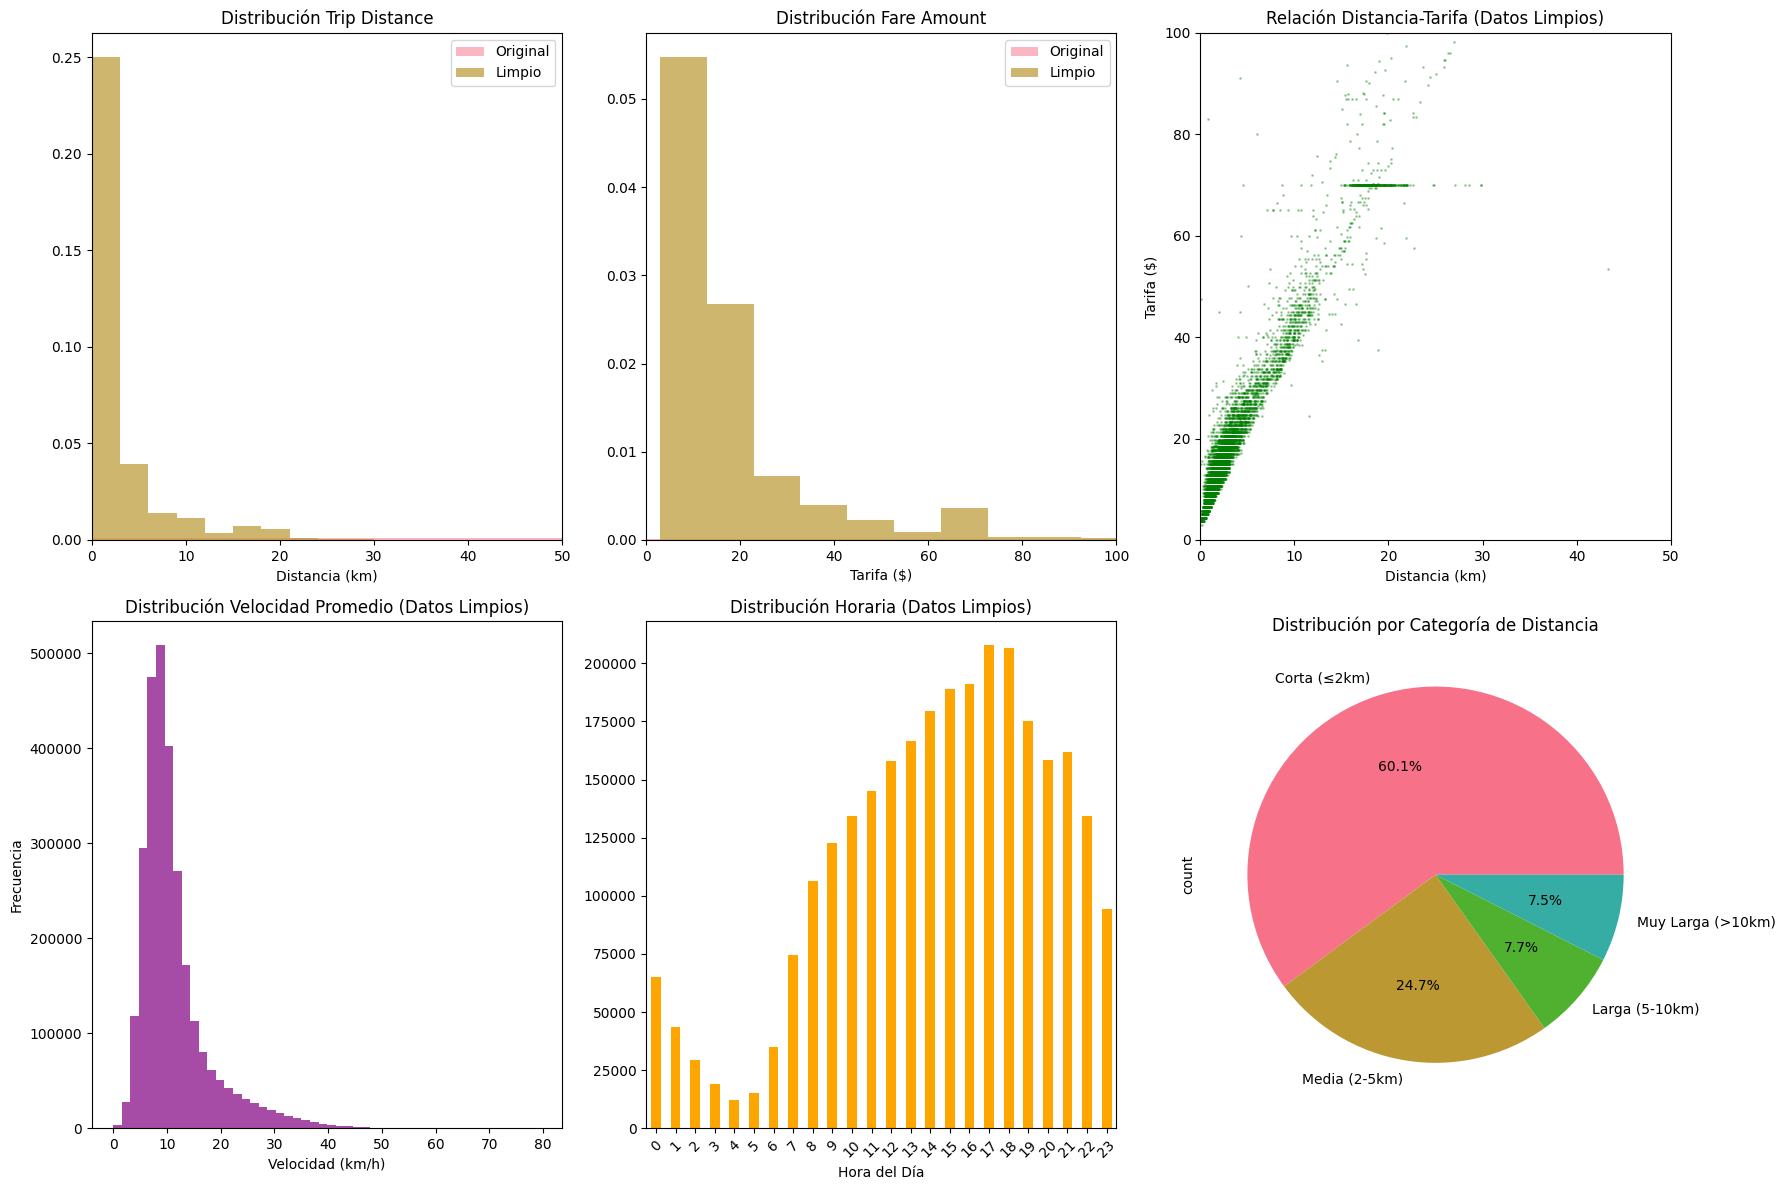


=== RESUMEN FINAL DEL PROCESO DE LIMPIEZA ===
Dataset original: 3,475,226 registros
Flex Fare (separados): 540,149 registros
Datos regulares: 2,935,077 registros
Datos problemáticos removidos: 109,579 registros
Dataset final limpio: 2,825,498 registros
Tasa de retención: 81.3%


In [17]:
import matplotlib.pyplot as plt

print("=== VISUALIZACIONES POST-LIMPIEZA ===\n")

# Creamos una figura con 6 gráficos para comparar datos limpios vs originales
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# ------------------------------------------------------
# 1. Distribución de distancias antes y después
# ------------------------------------------------------
axes[0, 0].hist(regular_data['trip_distance'], bins=50, alpha=0.4, label='Original', density=True, color='grey')
axes[0, 0].hist(datos_limpios['trip_distance'], bins=50, alpha=0.7, label='Limpio', density=True, color='teal')
axes[0, 0].set_title('Distancia de Viaje')
axes[0, 0].set_xlabel('Distancia (km)')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 50)

# ------------------------------------------------------
# 2. Distribución de tarifas antes y después
# ------------------------------------------------------
axes[0, 1].hist(regular_data['fare_amount'], bins=50, alpha=0.4, label='Original', density=True, color='grey')
axes[0, 1].hist(datos_limpios['fare_amount'], bins=50, alpha=0.7, label='Limpio', density=True, color='royalblue')
axes[0, 1].set_title('Monto de la Tarifa')
axes[0, 1].set_xlabel('Tarifa ($)')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 100)

# ------------------------------------------------------
# 3. Relación entre distancia y tarifa (datos limpios)
# ------------------------------------------------------
sample_limpio = datos_limpios.sample(min(10000, len(datos_limpios)), random_state=42)
axes[0, 2].scatter(sample_limpio['trip_distance'], sample_limpio['fare_amount'], alpha=0.3, s=2, c='green')
axes[0, 2].set_title('Distancia vs Tarifa (Limpio)')
axes[0, 2].set_xlabel('Distancia (km)')
axes[0, 2].set_ylabel('Tarifa ($)')
axes[0, 2].set_xlim(0, 50)
axes[0, 2].set_ylim(0, 100)

# ------------------------------------------------------
# 4. Distribución de velocidades promedio
# ------------------------------------------------------
axes[1, 0].hist(datos_limpios['velocidad_promedio'].dropna(), bins=50, alpha=0.7, color='purple')
axes[1, 0].set_title('Velocidad Promedio')
axes[1, 0].set_xlabel('Velocidad (km/h)')
axes[1, 0].set_ylabel('Frecuencia')

# ------------------------------------------------------
# 5. Horas del día preservadas tras limpieza
# ------------------------------------------------------
datos_limpios['pickup_hour'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Distribución Horaria')
axes[1, 1].set_xlabel('Hora del Día')
axes[1, 1].tick_params(axis='x', rotation=45)

# ------------------------------------------------------
# 6. Distribución por categoría de distancia
# ------------------------------------------------------
datos_limpios['categoria_distancia'].value_counts().plot(kind='pie', ax=axes[1, 2], autopct='%1.1f%%', startangle=90,
                                                          colors=plt.cm.Pastel1.colors)
axes[1, 2].set_ylabel('')
axes[1, 2].set_title('Categorías de Distancia')

# Mostrar todo ajustado
plt.tight_layout()
plt.show()


In [ ]:
print("\n=== RESUMEN FINAL DEL PROCESO DE LIMPIEZA ===")

print(f"📦 Dataset original completo: {len(df):,} registros")
print(f"💳 Registros Flex Fare (separados): {len(flex_fare_data):,}")
print(f"📊 Registros regulares analizados: {len(regular_data):,}")
print(f"⚠️ Registros problemáticos eliminados: {len(datos_problematicos):,}")
print(f"✅ Dataset final limpio: {len(datos_limpios):,} registros")
print(f"📈 Tasa de retención final: {len(datos_limpios) / len(df) * 100:.1f}%")


In [18]:
print("=== VARIABLES CATEGÓRICAS OPTIMIZADAS PARA DATOS LIMPIOS ===\n")

def crear_categorias_optimizadas(df):
    """
    Genera nuevas categorías más equilibradas para distancia y tarifa,
    usando cuartiles reales del dataset limpio.
    """

    # ----------------------------------------------------
    # 📏 1. Categorización de distancia según cuartiles
    # ----------------------------------------------------
    q_dist = df['trip_distance'].quantile([0.25, 0.5, 0.75])
    print(f"📊 Cuartiles de distancia (km): {q_dist.values.round(2)}")

    def categorizar_distancia(d):
        if pd.isna(d):
            return 'Desconocida'
        elif d <= q_dist[0.25]:
            return f'Muy Corta (≤{q_dist[0.25]:.1f}km)'
        elif d <= q_dist[0.5]:
            return f'Corta ({q_dist[0.25]:.1f}-{q_dist[0.5]:.1f}km)'
        elif d <= q_dist[0.75]:
            return f'Media ({q_dist[0.5]:.1f}-{q_dist[0.75]:.1f}km)'
        else:
            return f'Larga (>{q_dist[0.75]:.1f}km)'

    # ----------------------------------------------------
    # 💰 2. Categorización de tarifa según cuartiles
    # ----------------------------------------------------
    q_fare = df['fare_amount'].quantile([0.25, 0.5, 0.75])
    print(f"📊 Cuartiles de tarifa ($): {q_fare.values.round(2)}")

    def categorizar_tarifa(t):
        if pd.isna(t):
            return 'Desconocida'
        elif t <= q_fare[0.25]:
            return f'Económica (≤${q_fare[0.25]:.1f})'
        elif t <= q_fare[0.5]:
            return f'Media (${q_fare[0.25]:.1f}-${q_fare[0.5]:.1f})'
        elif t <= q_fare[0.75]:
            return f'Alta (${q_fare[0.5]:.1f}-${q_fare[0.75]:.1f})'
        else:
            return f'Premium (>${q_fare[0.75]:.1f})'

    # ----------------------------------------------------
    # 🏷️ Aplicar las nuevas categorías al dataset limpio
    # ----------------------------------------------------
    df['categoria_distancia_opt'] = df['trip_distance'].apply(categorizar_distancia)
    df['categoria_tarifa_opt'] = df['fare_amount'].apply(categorizar_tarifa)

    return df


=== VARIABLES CATEGÓRICAS OPTIMIZADAS PARA DATOS LIMPIOS ===
Cuartiles de distancia: [1.   1.63 3.  ]
Cuartiles de tarifa: [ 8.6 12.1 19.1]

Distribución de categorías optimizadas:
DISTANCIA:
categoria_distancia_opt
Muy Corta (≤1.0km)    741345
Larga (>3.0km)        705955
Media (1.6-3.0km)     704901
Corta (1.0-1.6km)     673297
Name: count, dtype: int64

TARIFA:
categoria_tarifa_opt
Económica (≤$8.6)     777630
Alta ($12.1-$19.1)    698081
Premium (>$19.1)      694668
Media ($8.6-$12.1)    655119
Name: count, dtype: int64


In [ ]:
# Aplicar recategorización a datos limpios
datos_limpios = crear_categorias_optimizadas(datos_limpios)

# Mostrar resumen de las nuevas categorías
print("\n📦 Distribución de categorías optimizadas:")

print("\n🚗 DISTANCIA:")
print(datos_limpios['categoria_distancia_opt'].value_counts())

print("\n💵 TARIFA:")
print(datos_limpios['categoria_tarifa_opt'].value_counts())



## **2. Decisiones de imputación**

No basta con rellenar: debes tomar decisiones conscientes.

### Actividad:
- Detecta columnas con valores nulos o atípicos.
- Aplica al menos 2 métodos de imputación distintos y compara sus efectos.
- Reflexiona sobre lo que cada método está asumiendo sobre tus datos.

### Preguntas para ti:
- ¿Qué pierde el dataset al imputar?
- ¿Qué variable puede distorsionarse más por un mal método?
- ¿Cuándo vale más eliminar una fila que rellenarla?

*(Recuerda: imputar es una reconstrucción de la realidad. ¿Qué realidad estás creando?)*


In [ ]:
### Comencemos :)


## **3. Codificación de variables categóricas**

### Actividad:
- Identifica al menos 2 columnas categóricas.
- Aplica dos métodos diferentes de codificación (Label, One-Hot, Binary, etc.).
- Justifica cuál elegirías y por qué.

### Preguntas para ti:
- ¿Tu codificación introduce un orden que no existe?
- ¿Qué tipo de modelo usarás y cómo influye eso en tu decisión?
- ¿Estás usando codificación “por costumbre” o por análisis?

*(Puedes usar la documentación de `pandas.get_dummies()` o `sklearn.preprocessing`.)*


In [ ]:
### Comencemos :)


## **4. Normalización y escalado**

### Actividad:
- Elige al menos 2 variables numéricas.
- Prueba con distintos escaladores y visualiza cómo cambian las distribuciones.
- Evalúa si eso es necesario para el tipo de modelo que planeas usar.

### Preguntas para ti:
- ¿Qué escalador cambia menos la distribución?
- ¿Qué pasa si escalas variables con muchos outliers?
- ¿Es necesario escalar si usarás un modelo basado en árboles?

*(Puedes comparar StandardScaler, MinMaxScaler, RobustScaler, etc.)*

## Propuesta opcional:
*Mostrar un antes y después con histogramas o boxplots (sns.histplot, sns.boxplot) para cada escalador.*

## Razón pedagógica:
*Ayuda a entender cómo afecta cada método la forma de los datos.*

In [ ]:
### Comencemos :)


## **5. Creación de nuevas variables**

### Actividad:
- Crea al menos 3 variables nuevas usando combinaciones, fechas, ubicaciones u otras fuentes externas. (Debes usar almenos una fuente externa)
- Evalúa si aportan valor predictivo real o si solo aumentan el ruido.

### Preguntas para ti:
- ¿Tu variable agrega información no contenida en las demás?
- ¿Se puede medir su aporte al modelo?
- ¿Es fácil de explicar para alguien que no sabe de datos?

### Propuesta opcional:
*Comparar visualmente cómo se distribuyen las nuevas variables o si ayudan a separar clases (con scatterplots, heatmaps, etc.).*

### Razón pedagógica:
* Las nuevas variables no deben "verse bonitas", sino ser útiles o interpretables.*

In [ ]:
### Comencemos :)


## **6. Análisis descriptivo final**

### Actividad:
- Vuelve a hacer el análisis exploratorio del inicio (`describe`, `info`, visualizaciones).
- Compara contra la versión original del dataset.

### Preguntas para ti:
- ¿El dataset ahora es más claro, más útil, más balanceado?
- ¿Qué variable fue más transformada? ¿Cuál mantuviste intacta, y por qué?


In [ ]:
### Comencemos :)


## **7. Revisión cruzada con IA**

### Actividad:
- Copia todo tu pipeline (en código o en texto) y consúltalo con ChatGPT.
- Analiza las sugerencias que te entrega.

### Preguntas para ti:
- ¿En qué coincides y en qué discrepas?
- ¿Qué harías distinto luego de leer sus observaciones?
- ¿Te diste cuenta de algún sesgo o error no detectado?

*(Esta etapa es clave: pensar con la IA, no dejar que piense por ti.)*


In [ ]:
### Comencemos :)


## **8. Dataset final listo para modelar**

Tu DataFrame limpio y transformado debe quedar como `df_final`.

Este dataset debe:
- Estar libre de nulos o incoherencias
- Tener variables bien codificadas y/o escaladas
- Tener variables nuevas justificadas
- Estar alineado con el problema predictivo que elegiste
- Debe tener un diccionario en un archivo PDF que contenga la conversión y su descripción de columnas y variables.

Puedes guardar tu resultado con:

```python
df_final.to_csv("dataset_preparado.csv", index=False)
```
